<a href="https://colab.research.google.com/github/gmac1el/Big-Data/blob/main/ETL_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula Prática - ETL**

Análise, Tipos e Mineração de Dados (ETL)

**Professor:** Geraldo Gomes

In [ ]:
#importando bibliotecas
#Numpy: Oferece funções essênciais para álgebra linear, manipulação de imagens e cálculos com arrays
#Pandas: Utilizada para a preparação e operação dos dados em alta performance. Trabalha com duas estruturas principais: Series (Array unidimensional) e Dataframes (bidimensional);
import numpy as np
import pandas as pd

In [ ]:
#Carregando os dados do CSV em um Dataframe Pandas
df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/99b42b09-95af-47de-8411-ab99c380c3ef/download/vacinados.csv', delimiter=';')

<ipython-input-14-fd4144aedb74>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/99b42b09-95af-47de-8411-ab99c380c3ef/download/vacinados.csv', delimiter=';')


In [ ]:
#Visualizando as 5 primeiras linhas do Dataframe
df.head()

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,30 a 34 anos,32,FEMININO,PARDA,OLINDA,TRABALHADORES DA SAÚDE,OUTROS,FF8842,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,NÃO,2021-10-07 00:00:00.0
1,35 a 39 anos,39,FEMININO,PARDA,IGARASSU,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,FD7210,3 - COMIRNATY (PFIZER),1.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-09-01 00:00:00.0
2,40 a 44 anos,40,FEMININO,PARDA,IGARASSU,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,FH8023,3 - COMIRNATY (PFIZER),2.0,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,NÃO,2021-10-31 00:00:00.0
3,25 a 29 anos,25,MASCULINO,BRANCA,RECIFE,SESAU - BUSCA ATIVA,PÚBLICO EM GERAL - 18 A 59 ANOS,FH4751,3 - COMIRNATY (PFIZER),2.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,NÃO,2021-11-29 00:00:00.0
4,60 a 64 anos,61,FEMININO,BRANCA,RECIFE,IDOSOS,OUTRAS,FM3802,3 - COMIRNATY (PFIZER),3.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-12-30 00:00:00.0


In [ ]:
#Obtendo informações sobre os tipos dos dados e verificando a existencia de dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041498 entries, 0 to 3041497
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   faixa_etaria       object 
 1   idade              object 
 2   sexo               object 
 3   raca_cor           object 
 4   municipio          object 
 5   grupo              object 
 6   categoria          object 
 7   lote               object 
 8   vacina_fabricante  object 
 9   descricao_dose     float64
 10  cnes               object 
 11  sistema_origem     object 
 12  data_vacinacao     object 
dtypes: float64(1), object(12)
memory usage: 301.7+ MB


In [ ]:
#Removendo algumas colunas nao utilizadas
df = df.drop(columns=['cnes', 'sistema_origem', 'data_vacinacao', 'grupo', 'categoria'])

In [ ]:
#Gerando uma análise descritiva
df.describe()

,descricao_dose
count,3.041218e+06
mean,1.642971e+00
std,6.778731e-01
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,2.000000e+00
max,4.000000e+00


In [ ]:
#Gerando uma análise descritiva com dados categoricos
df.describe(include='all')

,faixa_etaria,idade,sexo,raca_cor,municipio,lote,vacina_fabricante,descricao_dose
count,3041424,3041492,3041246,3041056,3039925,3041205,3041218,3.041218e+06
unique,23,254,5,10,444,229,4,NaN
top,35 a 39 anos,39,FEMININO,PARDA,RECIFE,FM3457,3 - COMIRNATY (PFIZER),NaN
freq,271301,52639,1745885,1375755,2911870,118397,1171264,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.642971e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.778731e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00


In [ ]:
#cruzando dados de tabelas
pd.crosstab(df['idade'],df['sexo'] )

sexo,1,2,FEMININO,MASCULINO,OUTROS
idade,,,,,
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,1,1,0
9,0,0,0,1,0
11,0,0,3,5,0
...,...,...,...,...,...
95,0,0,1080,297,4
96,0,0,858,242,3
97,0,0,564,158,1


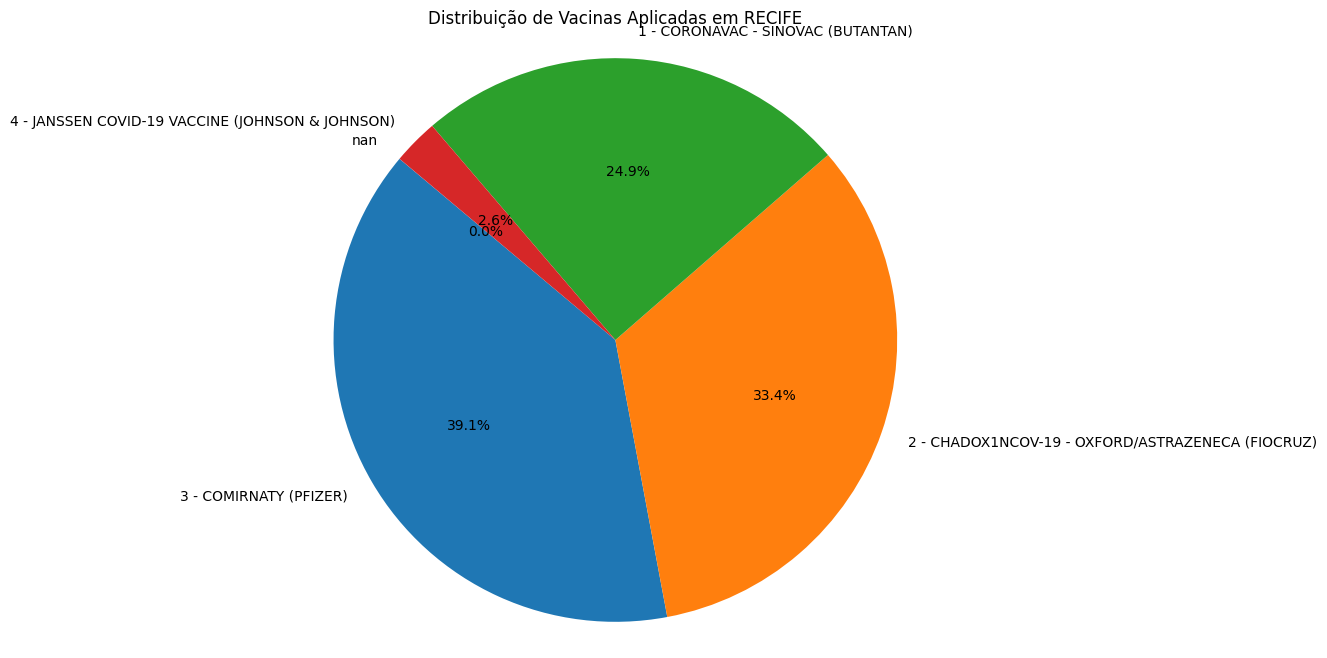

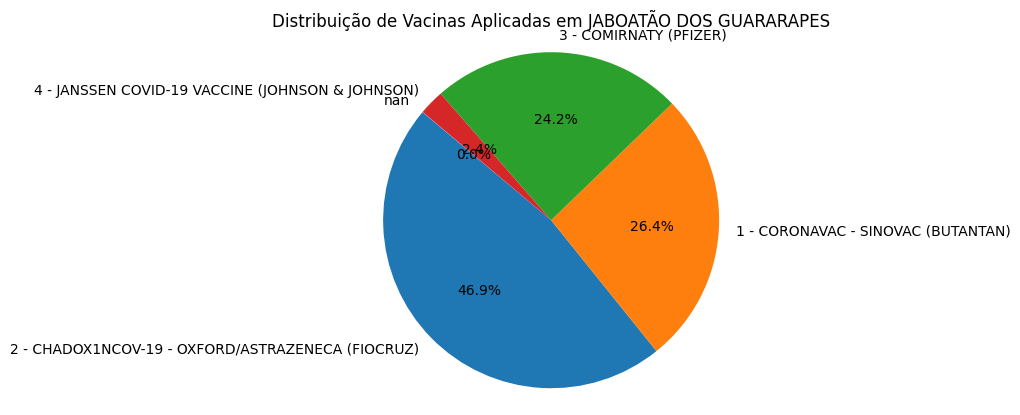

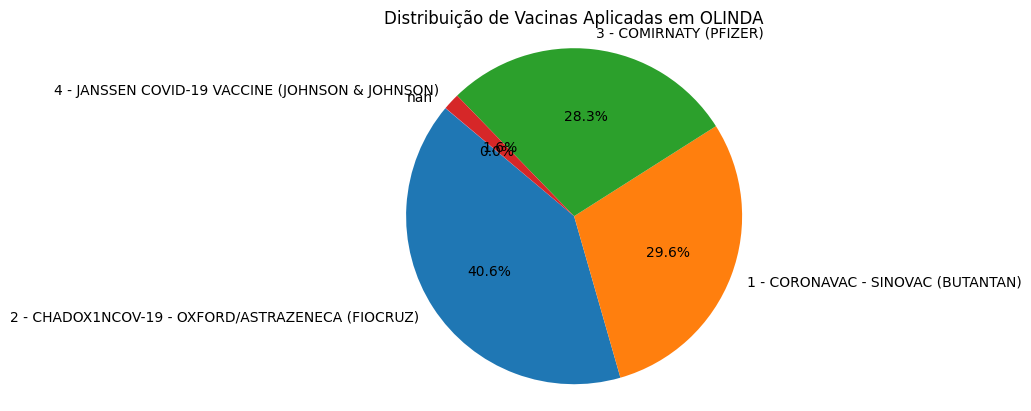

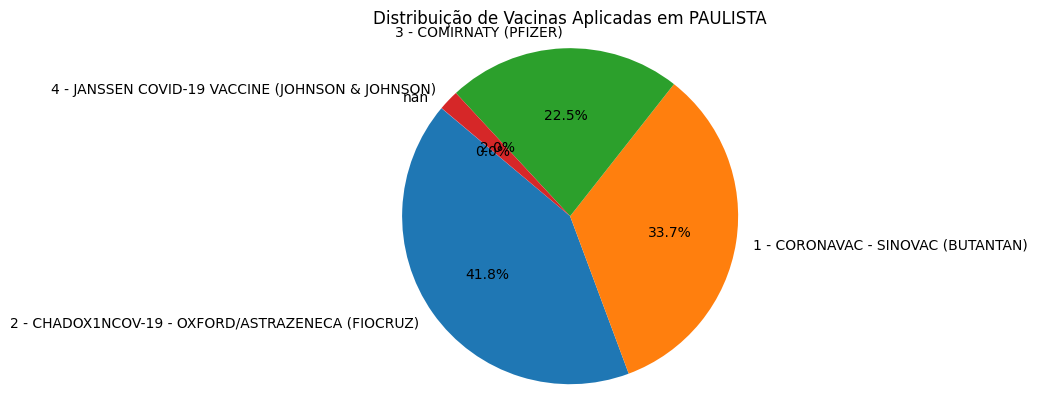

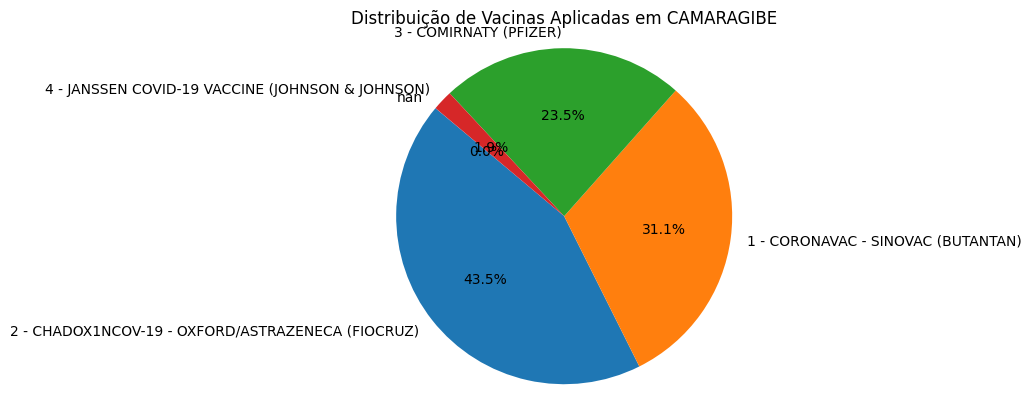

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Escolher um número limitado de municípios para exibição
num_municipios = 5

# Filtrar os municípios mais relevantes
municipios_relevantes = df['municipio'].value_counts().head(num_municipios).index

df_relevante = df[df['municipio'].isin(municipios_relevantes)]

# Criar um gráfico de pizza para mostrar a distribuição relativa das vacinas aplicadas nos municípios selecionados
plt.figure(figsize=(8, 8))
for municipio in municipios_relevantes:
    dados_municipio = df_relevante[df_relevante['municipio'] == municipio]
    contagem_vacinas = dados_municipio['vacina_fabricante'].value_counts()
    plt.pie(contagem_vacinas, labels=contagem_vacinas.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Mantém a proporção

    plt.title(f'Distribuição de Vacinas Aplicadas em {municipio}')
    plt.show()


Percebam que a quantidade de dados e as formas de visualizações escolhidas impactam na qualidade para um bom processo de tomada de decisão. Como melhorar isso?